### Directed Louvain Communities in Flow Network

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [1]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [4]:
sys.path.append(root)

In [5]:
from ffsc.flow import *

In [6]:
# dictionary assigning colors to different features of the network
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [7]:
# dictionary assigning paths to .csv files
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [8]:
gen = make_nx('coal')

carrier: coal
recipes used: coal


In [9]:
gen.all_data_dirs = all_data_dirs

In [10]:
gen._load_dfs()

In [11]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [12]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [13]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [14]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [15]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [16]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [17]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [18]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [19]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


**do edges_df**

In [20]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [21]:
edge_df = edge_df[edge_df.start!='supersource']

In [22]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [23]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [24]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [25]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [26]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [27]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [28]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [29]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') & (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') & (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# #fig.savefig('coal_supplynetwork.png')

# plt.show()

> A Graph showing all the Edges that are Solely Railway or Shipping Routes
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)

In [31]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6..."
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6..."
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6..."
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)"
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)"
...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1..."
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1..."
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1..."
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1..."


**do nodes df**

In [32]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [33]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [34]:
node_df = node_df[node_df.node!='supersource']

In [35]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [36]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [37]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [38]:
node_gdf

,node,D,node_ID,coordinates,geometry,type
0,coal_mine_1920,0,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",POINT (25.91700 -24.66700),coal
1,railway_node_25.9047571-24.6667781,0,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",POINT (25.90476 -24.66678),railway
2,coal_mine_1922,0,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",POINT (53.39400 35.57500),coal
3,railway_node_53.3958054211536635.55213928019969,0,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",POINT (53.39581 35.55214),railway
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
...,...,...,...,...,...,...
1057524,city_node_9970,9,city_node_9970,"[9.140014958055534, 12.218561270578235]",POINT (9.14001 12.21856),city
1057525,city_node_9981,6,city_node_9981,"[6.893405117769672, 11.846367254346195]",POINT (6.89341 11.84637),city
1057526,city_node_9989,16,city_node_9989,"[13.147584159650059, 11.766774687687745]",POINT (13.14758 11.76677),city
1057527,city_node_9990,75,city_node_9990,"[8.593431162223446, 12.00241287418524]",POINT (8.59343 12.00241),city


In [39]:
node_gdf['type'].unique()

array(['coal', 'railway', 'port', 'shipping', 'power', 'city'],
      dtype=object)

In [40]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')
# # plot coal mines, ports, cities, power stations

# node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
# node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# fig.savefig('coal_supplynetwork.png')

# plt.show()

> A Graph showing all the Edges that are Solely Railway or Shipping Routes, all the Nodes of Ports and Coal Mines and Nodes of Cities and Power Stations where D > 0
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)
 - ports (#7f5636 -> brown)
 - coal mines (#89163e -> burgundy)
 - cities (#96C3E4 -> sky blue)
 - power_stations (#8ac27e -> lime green)

### Force-Directed Layout

Out of memory error... loolll
... try again once having run community detection

In [41]:
edge_df['z_inv'] = 1/(edge_df['z']+1)

In [42]:
len(node_df.node.unique())

1031170

In [43]:
# get pos as dict
pos = node_df.drop_duplicates(subset='node')[['node','coordinates']].set_index('node').to_dict('index')

In [44]:
pos = {kk:json.loads(vv['coordinates']) for kk, vv in pos.items()}

In [45]:
z_inv_attr = edge_df[['start','end','z_inv']].set_index(['start','end']).to_dict(orient='index')

In [46]:
nx.set_edge_attributes(gen.G, z_inv_attr)

In [47]:
# pos = nx.spring_layout(gen.G, pos, iterations=1, weight='z_inv')
# big ole 'out of memory' error

### load flows and visualise them

In [48]:
flow_dict = pickle.load(open('./../coal_flow_dict.pkl','rb'))

In [49]:
len(flow_dict.keys())

1031171

In [50]:
flow_dict_reshape = {(i,j): flow_dict[i][j] 
                           for i in flow_dict.keys() 
                           for j in flow_dict[i].keys()}

In [51]:
flow_dict_reshape

{('coal_mine_1920', 'railway_node_25.9047571-24.6667781'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047571-24.6664075'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047254-24.6670633'): 0,
 ('coal_mine_1922', 'railway_node_53.3958054211536635.55213928019969'): 4677,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.38116831558798535.542777921444795'): 4570,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.4143905469255735.55813984128466'): 107,
 ('coal_mine_1923', 'railway_node_52.97519310345878636.17194361255421'): 301,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9916115331686136.16469565131024'): 0,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9547501069948936.182582800548694'): 301,
 ('coal_mine_1926', 'railway_node_-2.18300434.3093436'): 100505,
 ('railway_node_-2.18300434.3093436',
  'railway_node_-2.186293834.3087238'): 100505,
 ('

In [52]:
flow_df = pd.DataFrame.from_dict(flow_dict_reshape, orient='index')

In [53]:
flow_df['source']=flow_df.index.str[0]

In [54]:
flow_df = flow_df[~(flow_df.source=='supersource')]

In [55]:
flow_df = flow_df.rename(columns={0:'flow'})

In [56]:
flow_df

,flow,source
"(coal_mine_1920, railway_node_25.9047571-24.6667781)",14684,coal_mine_1920
"(railway_node_25.9047571-24.6667781, railway_node_25.9047571-24.6664075)",14684,railway_node_25.9047571-24.6667781
"(railway_node_25.9047571-24.6667781, railway_node_25.9047254-24.6670633)",0,railway_node_25.9047571-24.6667781
"(coal_mine_1922, railway_node_53.3958054211536635.55213928019969)",4677,coal_mine_1922
"(railway_node_53.3958054211536635.55213928019969, railway_node_53.38116831558798535.542777921444795)",4570,railway_node_53.3958054211536635.55213928019969
...,...,...
"(shipping_node_34564, shipping_node_34768)",0,shipping_node_34564
"(shipping_node_34564, shipping_node_33992)",0,shipping_node_34564
"(shipping_node_33992, shipping_node_34564)",0,shipping_node_33992
"(shipping_node_33992, shipping_node_34768)",0,shipping_node_33992


In [57]:
edge_df = edge_df.set_index(['start','end'])

In [58]:
edge_df['flow']=0

In [59]:
edge_df

z  \
start                                           end                                                       
coal_mine_1920                                  railway_node_25.9047571-24.6667781                    0   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                    0   
                                                railway_node_25.9047254-24.6670633                    0   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969       0   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795     0   
...                                                                                                 ...   
shipping_node_34564                             shipping_node_34768                                1212   
                                                shipping_node_33992                                 508   
shipping_node_33992                             shipping_node_34564                                 508   
                                                shipping_node_34768                                  49   
shipping_node_125192                            shipping_node_125717                                712   

                                                                                                  start_type  \
start                                           end                                                            
coal_mine_1920                                  railway_node_25.9047571-24.6667781                      coal   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                   railway   
                                                railway_node_25.9047254-24.6670633                   railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969         coal   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795    railway   
...                                                                                                      ...   
shipping_node_34564                             shipping_node_34768                                 shipping   
                                                shipping_node_33992                                 shipping   
shipping_node_33992                             shipping_node_34564                                 shipping   
                                                shipping_node_34768                                 shipping   
shipping_node_125192                            shipping_node_125717                                shipping   

                                                                                                   end_type  \
start                                           end                                                           
coal_mine_1920                                  railway_node_25.9047571-24.6667781                  railway   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                  railway   
                                                railway_node_25.9047254-24.6670633                  railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969     railway   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795   railway   
...                                                                                                     ...   
shipping_node_34564                             shipping_node_34768                                shipping   
                                                shipping_node_33992                                shipping   
shipping_node_33992                             shipping_node_34564                                shipping   
                                

In [60]:
edge_df.loc[flow_df.index, 'flow'] = flow_df['flow']

In [61]:
edge_df.flow.sum()

14771218517

In [62]:
edge_df = edge_df.reset_index()

In [63]:
edge_df = edge_df[edge_df['start']!='supersource']

In [64]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,z_inv,flow
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6...",1.000000,14684
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6...",1.000000,14684
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6...",1.000000,0
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)",1.000000,4677
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)",1.000000,4570
...,...,...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0.000824,0
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0.001965,0
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0.001965,0
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0.020000,0


### Visualise flow

In [65]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(30,20))
# ne.plot(ax=ax, color='#e3e3e3')
# # plot coal mines, ports, cities, power stations

# node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
# node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# # plot edges
# segs = []
# line_widths=[]
# line_colors = []

# for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway'))].iterrows():
#     segs.append(list(edge[1]['geometry'].coords))
#     line_widths.append(np.log10(edge[1]['flow']))
#     line_colors.append(colors['railways'])
    
# for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping'))].iterrows():
#     segs.append(list(edge[1]['geometry'].coords))
#     line_widths.append(np.log10(edge[1]['flow']))
#     line_colors.append(colors['shipping'])

# line_collection = LineCollection(segs, linewidths=line_widths, colors=line_colors)
    
# ax.add_collection(line_collection)
    
# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# fig.savefig('coal_flownetwork.png')

# plt.show()

> A Graph showing all the Nodes of Ports and Coal Mines and Nodes of Cities and Power Stations where D > 0 & weighting all the Edges that are Solely Railway or Shipping Routes
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)
 - ports (#7f5636 -> brown)
 - coal mines (#89163e -> burgundy)
 - cities (#96C3E4 -> sky blue)
 - power_stations (#8ac27e -> lime green)

In [66]:
# ## above but with no weighting on the edges

# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(30,20))
# ne.plot(ax=ax, color='#e3e3e3')
# # plot coal mines, ports, cities, power stations

# node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
# node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# # plot edges
# segs = []
# line_widths=[]
# line_colors = []

# for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway'))].iterrows():
#     segs.append(list(edge[1]['geometry'].coords))
#     # line_widths.append(np.log10(edge[1]['flow']))
#     line_colors.append(colors['railways'])
    
# for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping'))].iterrows():
#     segs.append(list(edge[1]['geometry'].coords))
#     # line_widths.append(np.log10(edge[1]['flow']))
#     line_colors.append(colors['shipping'])

# # line_collection = LineCollection(segs, linewidths=line_widths, colors=line_colors)
# line_collection = LineCollection(segs, colors=line_colors)
    
# ax.add_collection(line_collection)
    
# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')

# plt.show()

## Directed Louvain Community Detection

### Load Nodes to Communities from Directed Louvain

In [67]:
with open(os.path.join(root,'DirectedLouvain','output','graph_coal_flow_node2comm_level0')) as inp:
    rows = (line.split(' ') for line in inp)
    node2comm_coal = {int(row[0]):int(row[1]) for row in rows}

In [68]:
node2comm_coal

{0: 14988,
 1: 14988,
 2: 420342,
 3: 420342,
 4: 930520,
 5: 930520,
 6: 24907,
 7: 24907,
 8: 22169,
 9: 22169,
 10: 15543,
 11: 15543,
 12: 0,
 13: 1,
 14: 2,
 15: 3,
 16: 25606,
 17: 25606,
 18: 4,
 19: 5,
 20: 6,
 21: 6,
 22: 7,
 23: 8,
 24: 50544,
 25: 50544,
 26: 917925,
 27: 917925,
 28: 39517,
 29: 39517,
 30: 9,
 31: 10,
 32: 50813,
 33: 50813,
 34: 11,
 35: 12,
 36: 93654,
 37: 93654,
 38: 87542,
 39: 87542,
 40: 927245,
 41: 927245,
 42: 13,
 43: 14,
 44: 842137,
 45: 842137,
 46: 790731,
 47: 790731,
 48: 15,
 49: 16,
 50: 17,
 51: 18,
 52: 789559,
 53: 789559,
 54: 19,
 55: 20,
 56: 21,
 57: 22,
 58: 23,
 59: 24,
 60: 25,
 61: 26,
 62: 27,
 63: 28,
 64: 304367,
 65: 304367,
 66: 29,
 67: 30,
 68: 31,
 69: 32,
 70: 33,
 71: 34,
 72: 35,
 73: 36,
 74: 37,
 75: 38,
 76: 306655,
 77: 306655,
 78: 39,
 79: 40,
 80: 41,
 81: 42,
 82: 43,
 83: 44,
 84: 45,
 85: 46,
 86: 811933,
 87: 811933,
 88: 47,
 89: 48,
 90: 49,
 91: 50,
 92: 51,
 93: 790731,
 94: 52,
 95: 53,
 96: 54,
 97:

In [69]:
node_df['coordinates'][0]

'[25.917000000186725, -24.666999999954218]'

### Create dictionary of communities (keys) to nodes in community (values)

In [70]:
comm2nodes_coal = {}
for k, v in node2comm_coal.items():
    comm2nodes_coal.setdefault(v, []).append(k)

In [71]:
# comm2nodes_coal

### Switch number of nodes in this dictionary to their coordinates

In [72]:
import copy

In [73]:
comm2coord_coal = copy.deepcopy(comm2nodes_coal)

for i in range(len(comm2coord_coal)):
    for j in range (len(comm2coord_coal[i])):
        comm2coord_coal[i][j] = node_df['coordinates'][comm2coord_coal[i][j]]

# Information

In [74]:
com_sizes = []
for i in range(0, len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    com_sizes.append(a)

In [75]:
small2large_com_sizes = sorted(com_sizes)
small2large_com_sizes = list(filter((1).__ne__, small2large_com_sizes))

print(small2large_com_sizes)

[3, 3, 3, 5, 6, 6, 6, 6, 6, 6, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 17, 17, 17, 18, 19, 19, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 27, 28, 28, 29, 29, 30, 31, 31, 31, 32, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 37, 38, 38, 38, 40, 42, 42, 43, 43, 45, 46, 46, 47, 47, 47, 47, 49, 50, 50, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 61, 61, 63, 65, 65, 65, 66, 66, 68, 69, 69, 70, 71, 71, 72, 75, 76, 77, 78, 79, 80, 80, 82, 83, 84, 85, 87, 87, 88, 90, 94, 94, 98, 99, 101, 101, 102, 102, 103, 104, 106, 107, 107, 108, 111, 112, 114, 114, 114, 116, 119, 121, 121, 124, 124, 124, 126, 127, 128, 132, 132, 136, 137, 139, 142, 143, 149, 149, 149, 149, 150, 151, 152, 152, 154, 156, 158, 160, 162, 166, 167, 167, 167, 169, 170, 171, 175, 175, 176, 177, 178, 179, 179, 179, 181, 186, 192, 194, 195, 196, 199, 201, 205, 206, 209, 209, 210, 211, 211, 211, 212, 218, 219, 219, 222

In [76]:
len(small2large_com_sizes)

408

# Smallest Communities

I did this a pretty terrible way where I droppped copied the node and edge dataframe and dropped all the rows of nodes and edges that were not in the smallest communites. This allowed me a greater way to sanity check to ensure that the communities plotted were correct, but ideally this should have all been done using the original dataframe. 

After the duplicates of smallest_comm_coords have been removed, this can be done by using:

    import ast
    for i in range(len(smallest_comm_coords)):
        smallest_comm_coords[i] = ast.literal_eval(smallest_comm_coords[i])
    
to remove strings from the nodes in the smallest communities (smallest_comm_coords) and then only plotting nodes with coordinates in this list in the plot (in a similar way to the use of the line collection in the weighted flow diagram). I was not able to find a way to do this and continued using this method due to time constraints.

## Creating DataFrame to plot

In [118]:
import copy

In [119]:
edge_gdf_smallest_community = copy.deepcopy(edge_gdf)
node_gdf_smallest_community = copy.deepcopy(node_gdf)

## edges to drop

In [120]:
### finding nodes in smallest community

smallest_comm_coords_list = [] ### nodes in interesting community 


for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    for j in range(50): ## smallest 50 communities, not of size 1, are selected
        if a == small2large_com_sizes[j]: ### choosing size of the community here! ### smallest_comm_size
            smallest_comm_coords_list.append(comm2coord_coal[i])
            
# this method of appending, adds duplicates of nodes in communities of the same size
# this has no impact on the final output

In [121]:
smallest_comm_coords_list # list of lists of coordinates

[['[19.312778, 51.233611]',
  '[19.27771100055088, 51.29643150052982]',
  '[19.3265, 51.2679]'],
 ['[19.312778, 51.233611]',
  '[19.27771100055088, 51.29643150052982]',
  '[19.3265, 51.2679]'],
 ['[19.312778, 51.233611]',
  '[19.27771100055088, 51.29643150052982]',
  '[19.3265, 51.2679]'],
 ['[-111.01896800034446, 39.439845999972356]',
  '[-111.093889, 39.408333]',
  '[-111.0781, 39.3792]'],
 ['[-111.01896800034446, 39.439845999972356]',
  '[-111.093889, 39.408333]',
  '[-111.0781, 39.3792]'],
 ['[-111.01896800034446, 39.439845999972356]',
  '[-111.093889, 39.408333]',
  '[-111.0781, 39.3792]'],
 ['[-107.631111, 40.452222]',
  '[-107.63181299994035, 40.45359699984288]',
  '[-107.57045200023018, 40.49684800002552]',
  '[-107.58699700038511, 40.489853999779136]',
  '[-107.5824139993722, 40.461147999698866]',
  '[-107.58320899942822, 40.46112899976643]',
  '[-107.5895399997235, 40.46159099956105]',
  '[-107.58489899960789, 40.46149399967825]',
  '[-107.6306419994764, 40.45455400000331]',


In [122]:
smallest_comm_coords = []

for i in range(len(smallest_comm_coords_list)):
    for j in range(len(smallest_comm_coords_list[i])):
        smallest_comm_coords.append(smallest_comm_coords_list[i][j])

In [123]:
len(smallest_comm_coords)

3505

In [124]:
# remove duplicates
smallest_comm_coords = list(set(smallest_comm_coords))

In [125]:
smallest_comm_coords

['[87.46375283097603, 53.69530484556312]',
 '[-94.66722500038519, 35.16567700030785]',
 '[-79.165797, 40.500364]',
 '[-79.3264139994165, 40.664944999717406]',
 '[29.353829, -25.9688146]',
 '[52.98099999974161, 36.17099999993142]',
 '[-81.1708220001362, 39.98915399959074]',
 '[20.849376999505665, 42.908710499911265]',
 '[-76.46690499965521, 40.623806000008706]',
 '[87.414, 53.645]',
 '[-80.3649449998018, 39.40288500013702]',
 '[-107.58489899960789, 40.46149399967825]',
 '[-52.37578632742942, -29.851148518186566]',
 '[38.418258999718425, 48.80376400005299]',
 '[151.4887199992922, -33.19263000015424]',
 '[-86.90728799952616, 37.715363000193065]',
 '[-81.193686, 40.008717]',
 '[-2.694162000584288, 52.08257649980962]',
 '[-76.48974600008759, 40.621525000207896]',
 '[20.878971499709134, 42.872831999531755]',
 '[52.975193103458786, 36.17194361255421]',
 '[151.5418, -33.2117]',
 '[-107.57045200023018, 40.49684800002552]',
 '[-108.47673600018199, 36.68763100037988]',
 '[38.45021100057141, 48.87

In [126]:
len(smallest_comm_coords)

550

In [127]:
edges_to_drop_small = []

for i in range(len(edge_gdf_smallest_community)):
    if str(edge_gdf_smallest_community['start_coordinates'][i]) not in smallest_comm_coords or str(edge_gdf_smallest_community['end_coordinates'][i]) not in smallest_comm_coords:
        edges_to_drop_small.append(i)

In [128]:
edges_to_drop_small

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 39,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 60,
 61,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 197,
 198,
 201,
 202,
 203,
 204,
 205,


In [129]:
edge_gdf_smallest_community = edge_gdf_smallest_community.drop(index = edges_to_drop_small)

In [130]:
edge_gdf_smallest_community

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,z_inv
6,coal_mine_1923,railway_node_52.97519310345878636.17194361255421,0,coal,railway,"[52.98099999974161, 36.17099999993142]","[52.975193103458786, 36.17194361255421]","LINESTRING (52.98100 36.17100, 52.97519 36.17194)",1.0
8,railway_node_52.97519310345878636.17194361255421,railway_node_52.9547501069948936.182582800548694,0,railway,railway,"[52.975193103458786, 36.17194361255421]","[52.95475010699489, 36.182582800548694]","LINESTRING (52.97519 36.17194, 52.95475 36.18258)",1.0
34,coal_mine_1936,railway_node_29.4507712-26.0836388,0,coal,railway,"[29.45000000065486, -26.082999999459133]","[29.4507712, -26.0836388]","LINESTRING (29.45000 -26.08300, 29.45077 -26.0...",1.0
36,railway_node_29.4507712-26.0836388,railway_node_29.4559704-26.0819889,0,railway,railway,"[29.4507712, -26.0836388]","[29.4559704, -26.0819889]","LINESTRING (29.45077 -26.08364, 29.45597 -26.0...",1.0
37,coal_mine_1937,railway_node_29.3420968-25.9824651,0,coal,railway,"[29.266999999218342, -25.982999999700844]","[29.3420968, -25.9824651]","LINESTRING (29.26700 -25.98300, 29.34210 -25.9...",1.0
...,...,...,...,...,...,...,...,...,...
2182704,railway_node_-38.63829026847122-3.760127708826619,railway_node_-38.546831129283575-3.71649602797...,1,railway,railway,"[-38.63829026847122, -3.760127708826619]","[-38.546831129283575, -3.716496027974846]","LINESTRING (-38.63829 -3.76013, -38.54683 -3.7...",0.5
2182706,railway_node_-38.68984941400365-3.773590724470451,railway_node_-38.7886400088741-3.79391233995134,1,railway,railway,"[-38.68984941400365, -3.773590724470451]","[-38.7886400088741, -3.79391233995134]","LINESTRING (-38.68985 -3.77359, -38.78864 -3.7...",0.5
2182707,railway_node_-38.68984941400365-3.773590724470451,railway_node_-38.63829026847122-3.760127708826619,1,railway,railway,"[-38.68984941400365, -3.773590724470451]","[-38.63829026847122, -3.760127708826619]","LINESTRING (-38.68985 -3.77359, -38.63829 -3.7...",0.5
2182709,railway_node_-38.7886400088741-3.79391233995134,railway_node_-38.68984941400365-3.773590724470451,1,railway,railway,"[-38.7886400088741, -3.79391233995134]","[-38.68984941400365, -3.773590724470451]","LINESTRING (-38.78864 -3.79391, -38.68985 -3.7...",0.5


## nodes to drop

In [131]:
nodes_to_drop_small = []

for i in range(len(node_gdf_smallest_community)):
    if str(node_gdf_smallest_community['coordinates'][i]) not in smallest_comm_coords:
        nodes_to_drop_small.append(i)

In [132]:
node_gdf_smallest_community = node_gdf_smallest_community.drop(index = nodes_to_drop_small)

In [133]:
node_gdf_smallest_community

,node,D,node_ID,coordinates,geometry,type
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
5,railway_node_52.97519310345878636.17194361255421,0,railway_node_52.97519310345878636.17194361255421,"[52.975193103458786, 36.17194361255421]",POINT (52.97519 36.17194),railway
24,coal_mine_1936,0,coal_mine_1936,"[29.45000000065486, -26.082999999459133]",POINT (29.45000 -26.08300),coal
25,railway_node_29.4507712-26.0836388,0,railway_node_29.4507712-26.0836388,"[29.4507712, -26.0836388]",POINT (29.45077 -26.08364),railway
26,coal_mine_1937,0,coal_mine_1937,"[29.266999999218342, -25.982999999700844]",POINT (29.26700 -25.98300),coal
...,...,...,...,...,...,...
1056462,city_node_6951,4557,city_node_6951,"[85.79367035391536, 22.402159473447917]",POINT (85.79367 22.40216),city
1056479,city_node_6989,2078,city_node_6989,"[85.64327414400609, 22.239288351780367]",POINT (85.64327 22.23929),city
1056812,city_node_776,4657,city_node_776,"[-38.80069209147456, -3.7224692271614974]",POINT (-38.80069 -3.72247),city
1057104,city_node_8497,50,city_node_8497,"[54.01744888523609, 36.74501770973613]",POINT (54.01745 36.74502),city


## plotting

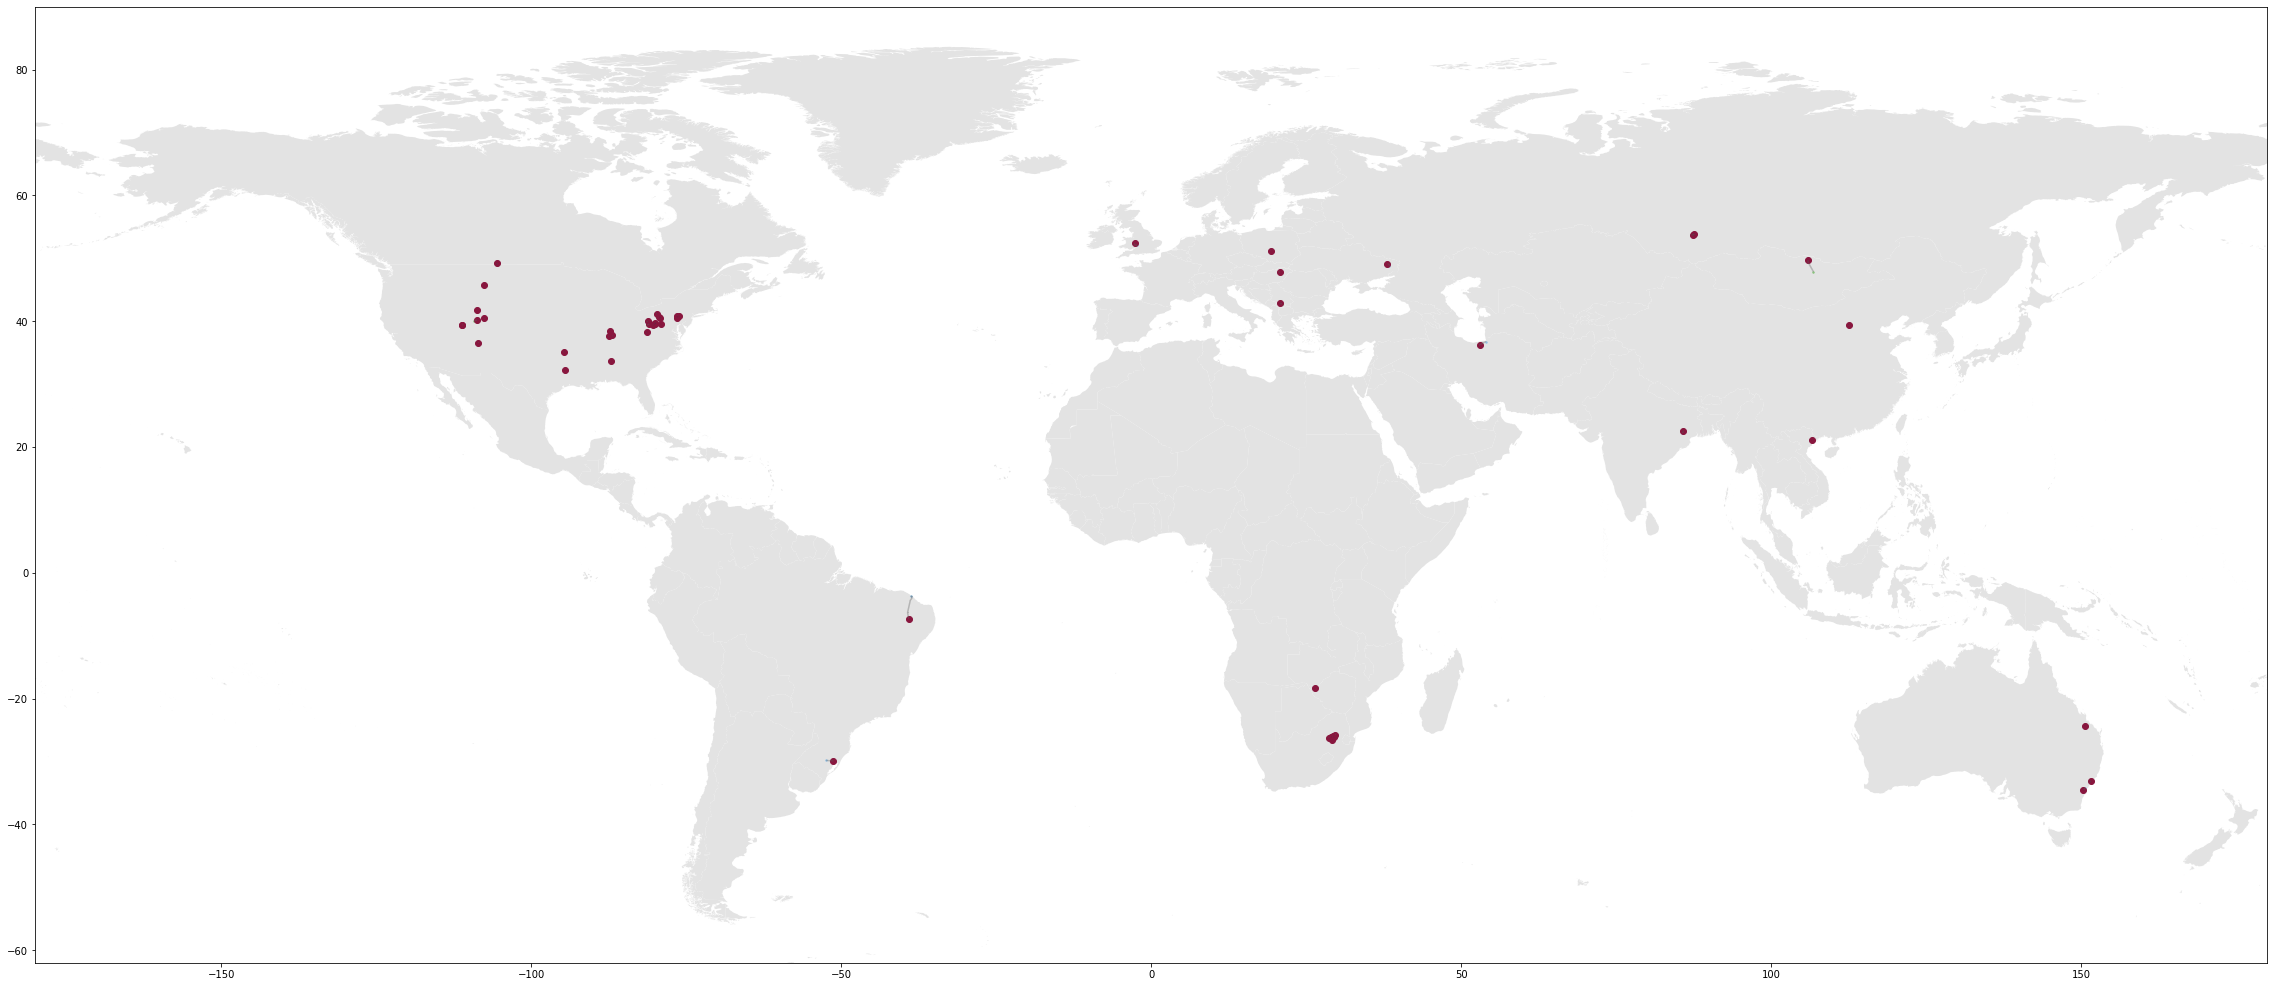

In [185]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
# node_gdf_largest_community[(node_gdf_largest_community['type']=='railway')].plot(ax=ax, color=colors['railways'])

node_gdf_smallest_community[(node_gdf_smallest_community['type']=='city')].plot(ax=ax, color=colors['cities'], markersize=2)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='power')].plot(ax=ax, color=colors['power_stations'], markersize=2)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# plot edges
edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='railway') | (edge_gdf_smallest_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='shipping') | (edge_gdf_smallest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('on')
# fig.savefig('coal_flow_network_50_small_communities.png')

plt.show()

In [135]:
# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])

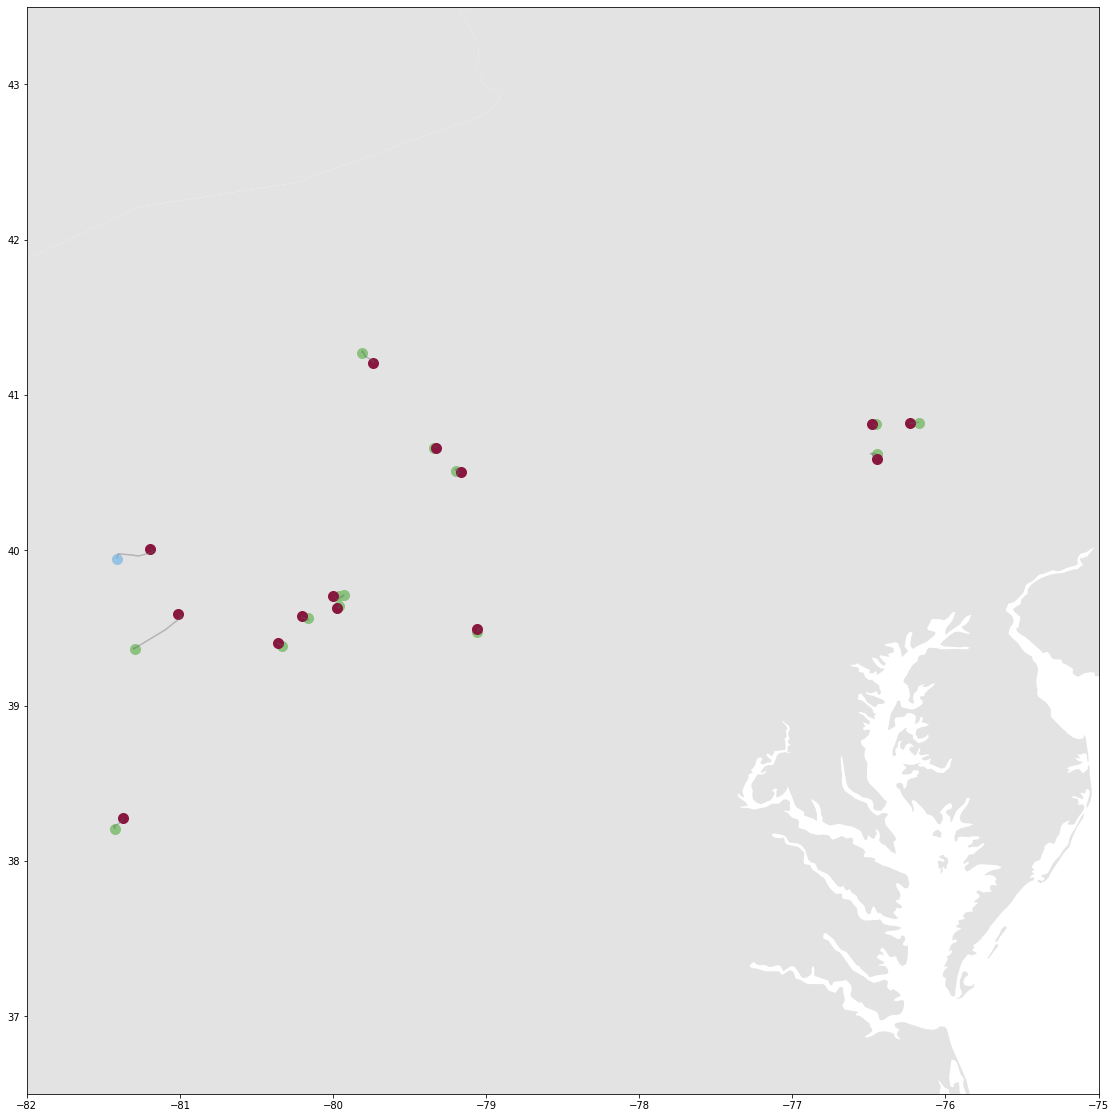

In [178]:
# Eastern US


#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf_smallest_community[(node_gdf_smallest_community['type']=='city')].plot(ax=ax, color=colors['cities'], markersize = 100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='power')].plot(ax=ax, color=colors['power_stations'], markersize = 100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'], markersize = 100)

# plot edges
edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='railway') | (edge_gdf_smallest_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='shipping') | (edge_gdf_smallest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)

ax.set_xlim([-82,-75])
ax.set_ylim([36.5,43.5])

#ax.set_xlim([-180,180])
#ax.set_ylim([-62,90])
ax.axis('on')
fig.savefig('coal_flow_network_50_small_communities_US.png')

plt.show()

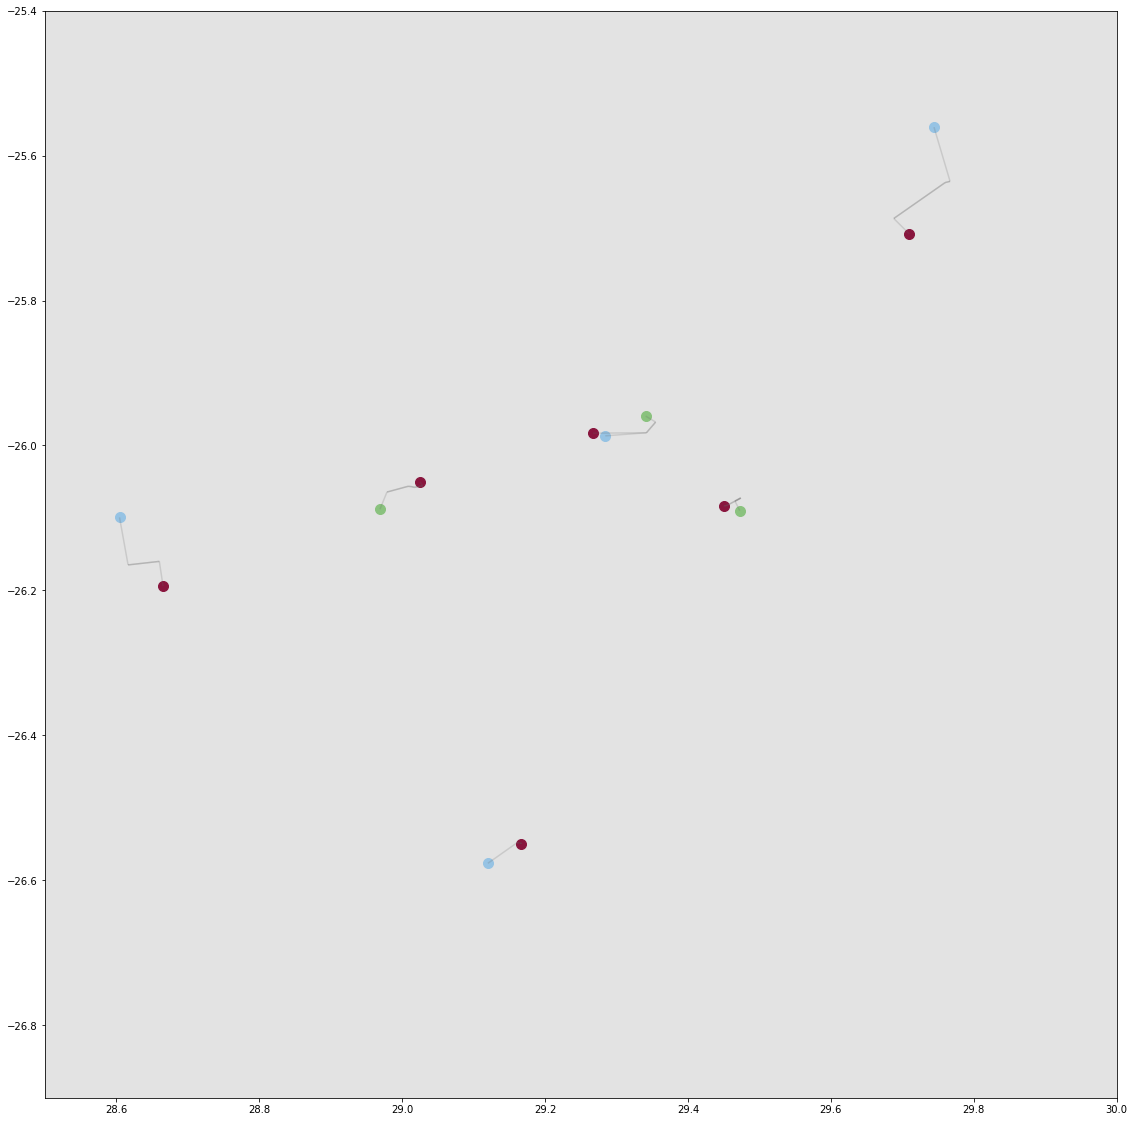

In [180]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf_smallest_community[(node_gdf_smallest_community['type']=='city')].plot(ax=ax, color=colors['cities'], markersize = 100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='power')].plot(ax=ax, color=colors['power_stations'], markersize = 100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'], markersize = 100)

# plot edges
edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='railway') | (edge_gdf_smallest_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='shipping') | (edge_gdf_smallest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)

ax.set_xlim([28.5,30])
ax.set_ylim([-26.9,-25.4])

#ax.set_xlim([-180,180])
#ax.set_ylim([-62,90])
ax.axis('on')
fig.savefig('coal_flow_network_50_small_communities_SA.png')

plt.show()

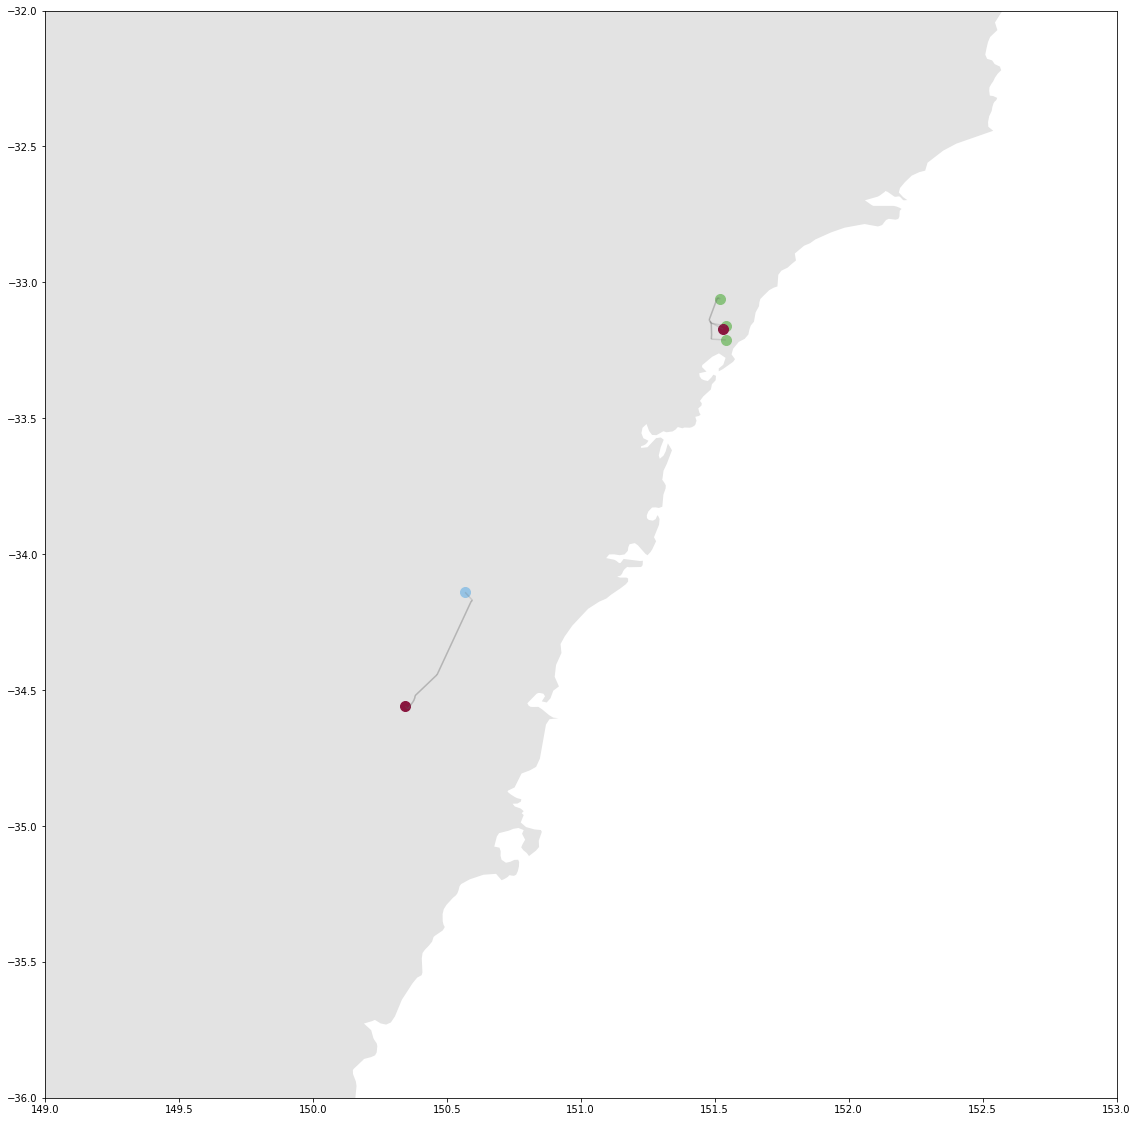

In [179]:
# Australia

#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
# node_gdf_largest_community[(node_gdf_largest_community['type']=='railway')].plot(ax=ax, color=colors['railways'])

node_gdf_smallest_community[(node_gdf_smallest_community['type']=='city')].plot(ax=ax, color=colors['cities'], markersize=100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='power')].plot(ax=ax, color=colors['power_stations'], markersize=100)
node_gdf_smallest_community[(node_gdf_smallest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'], markersize=100)

# plot edges
edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='railway') | (edge_gdf_smallest_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf_smallest_community[(edge_gdf_smallest_community['start_type']=='shipping') | (edge_gdf_smallest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([149,153])
ax.set_ylim([-36,-32])
ax.axis('on')
fig.savefig('coal_flow_network_50_small_communities_Aus.png')

plt.show()